In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
with uproot.open("./DataR_run_1.root") as file:
    for k, v in file["Data_R"].items():
        print(f"Name: {k} \t type: {v}")
    channels = file["Data_R/Channel"].array().to_numpy()
    boards   = file["Data_R/Board"].array().to_numpy()
    flags    = file["Data_R/Flags"].array().to_numpy()
    time     = file["Data_R/Timestamp"].array().to_numpy()
    energy   = file["Data_R/Energy"].array().to_numpy()

df = pd.DataFrame({"board":boards, "channel":channels, "flag":flags, "timestamp":time, "energy":energy})

Name: Channel 	 type: <TBranch 'Channel' at 0x00010fb6c3a0>
Name: Timestamp 	 type: <TBranch 'Timestamp' at 0x00010fb7c6a0>
Name: Board 	 type: <TBranch 'Board' at 0x00010fb7c9a0>
Name: Energy 	 type: <TBranch 'Energy' at 0x00010fb981c0>
Name: Flags 	 type: <TBranch 'Flags' at 0x00010fb98970>


In [3]:
df["ch"] = df["board"] * 16 + df["channel"]
df.head()

,board,channel,flag,timestamp,energy,ch
0,2,0,0,38430512000,3588,32
1,2,0,0,304888508000,3,32
2,2,1,0,354307524000,3887,33
3,2,2,0,38430532000,0,34
4,2,2,0,354307536000,12,34


8 canali per ogni spicchio, le board si riferiscono ai digitizer! 

7 spicchi di spider, 8 canali ciascuno. 3 digitizer si prendono 2 spicchi (16 canali) e un digitizer (il 5) si prende solo uno spicchio.

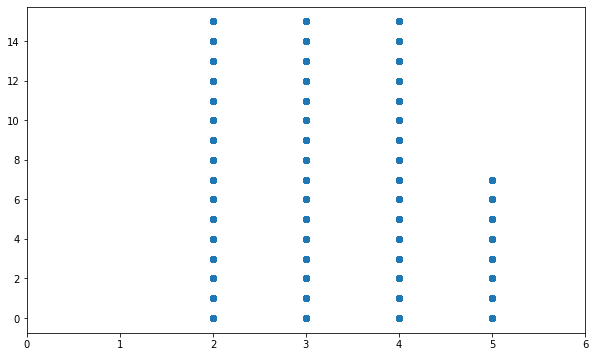

In [14]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

ax.scatter(boards, channels)

ax.set_xlim(0, 6)
plt.show()

In [60]:
df.groupby("flag").size()

flag
0        48238424
2048        46429
32768     3388110
34816        3244
dtype: int64

occupanza canali

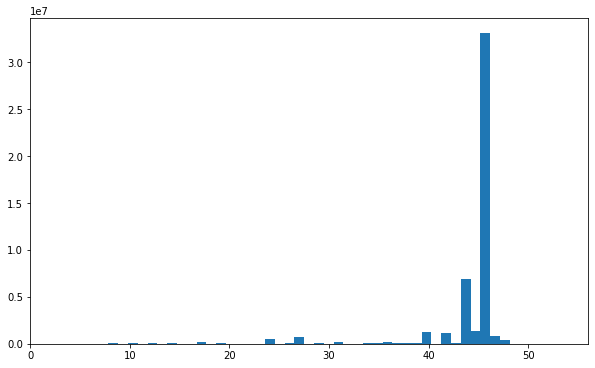

In [67]:
mask = (df.flag == 0)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

ax.hist(df[mask].ch-32, bins=56)

ax.set_xlim(0, 56)
plt.show()

spettri in energia per strip (56 strips)

3 picchi - curio americio plutonio

5.805 (curio)
5.486 (americio)
5.155 (plutonio)

In [7]:
# filter energies > 1000
df_e_filtered = df[(df.energy > 3000)&(df.energy<4000)]

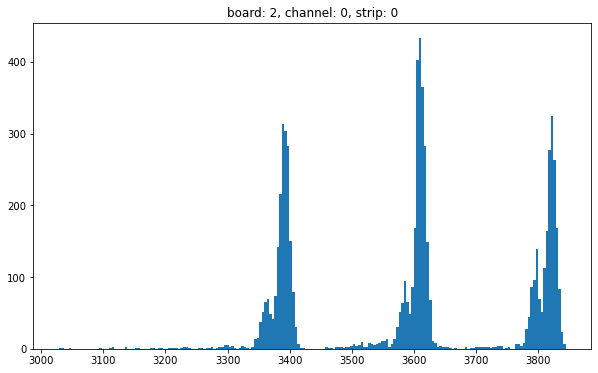

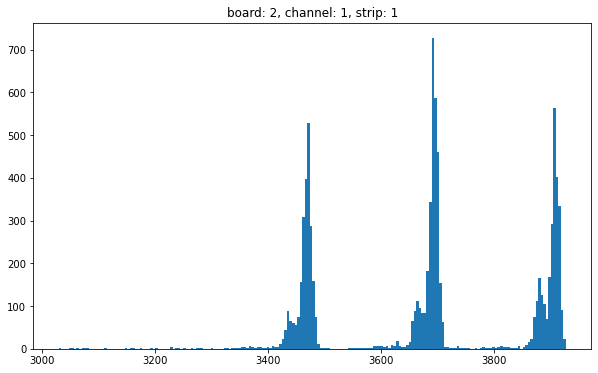

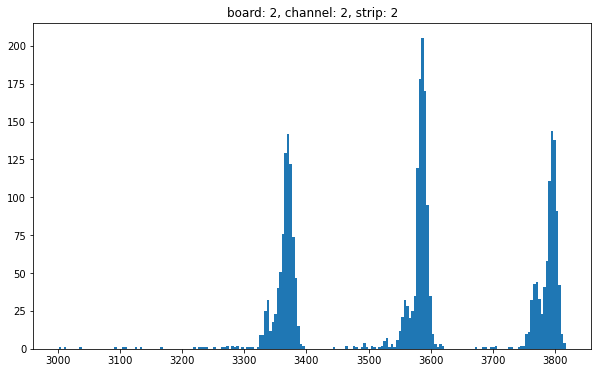

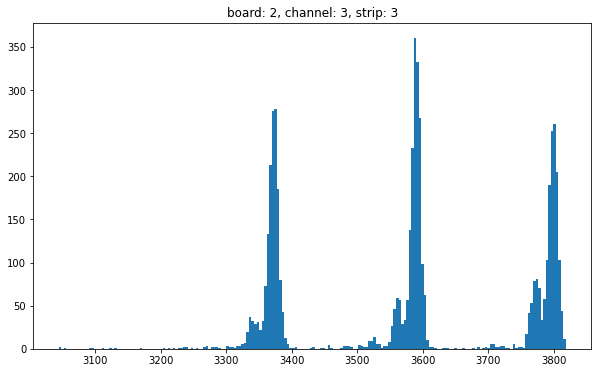

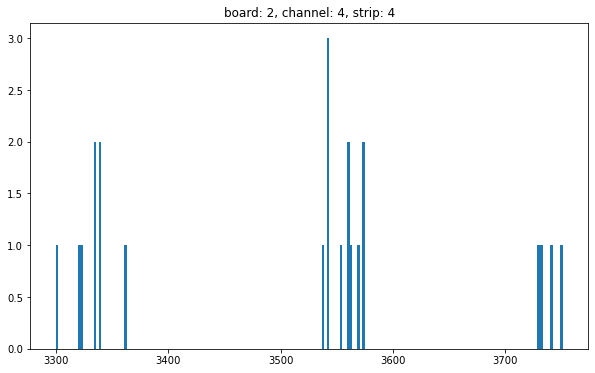

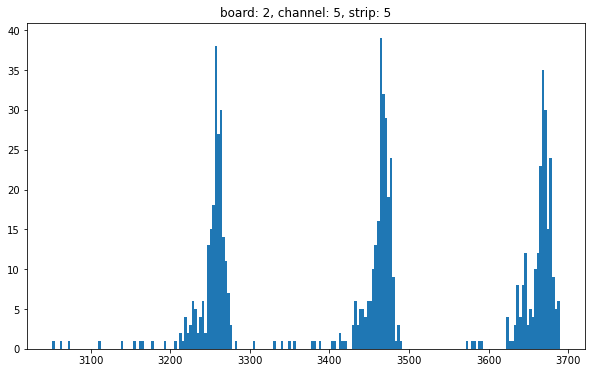

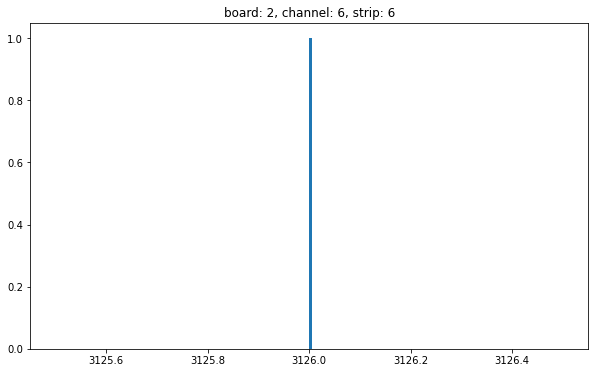

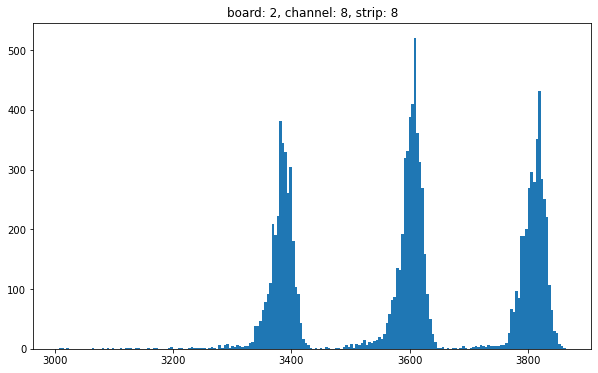

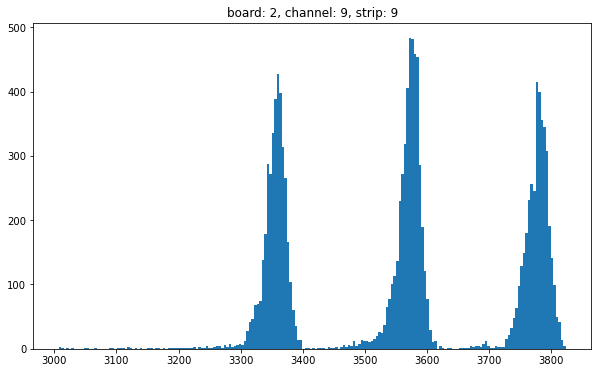

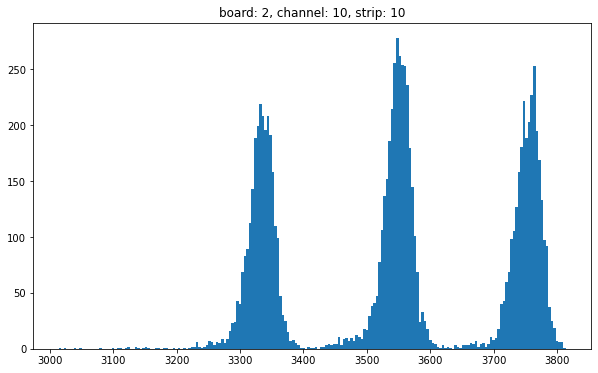

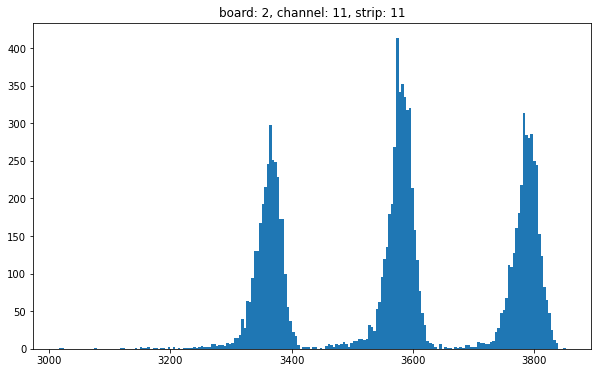

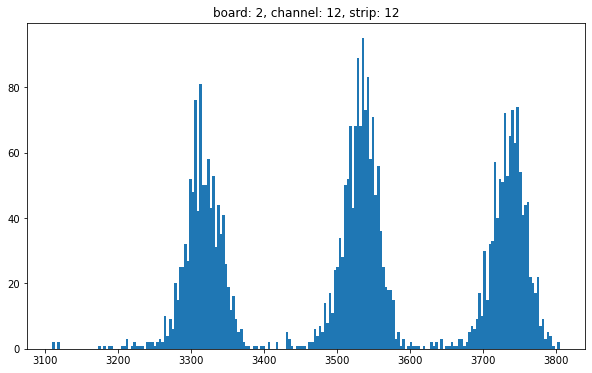

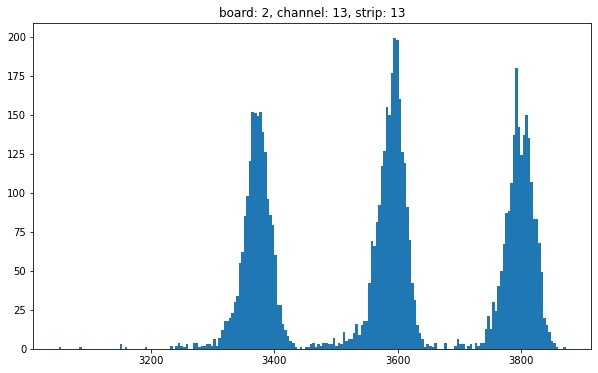

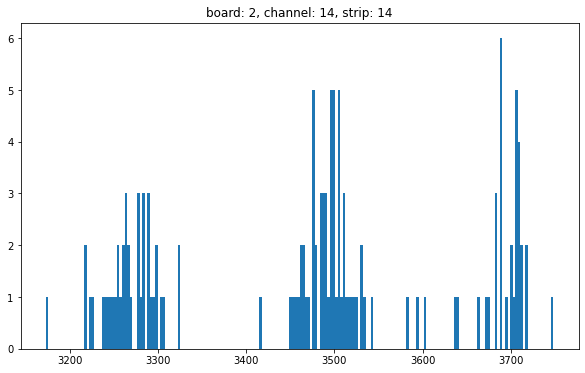

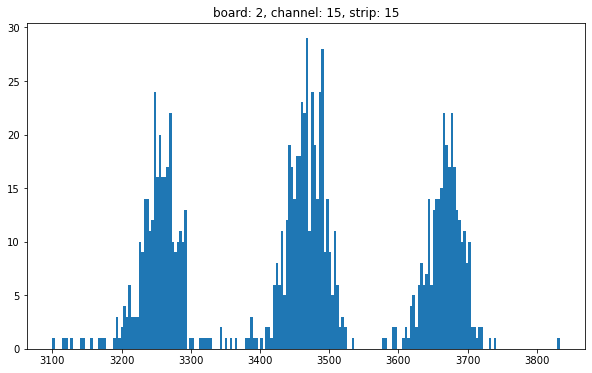

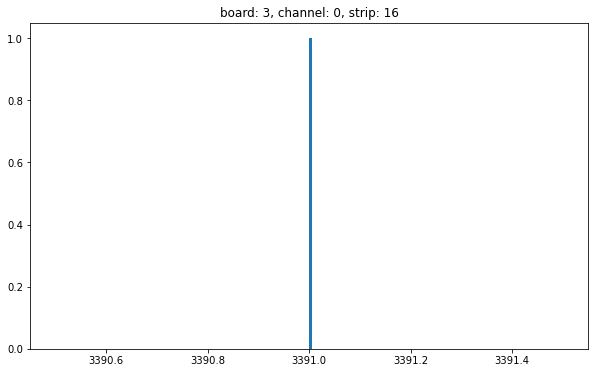

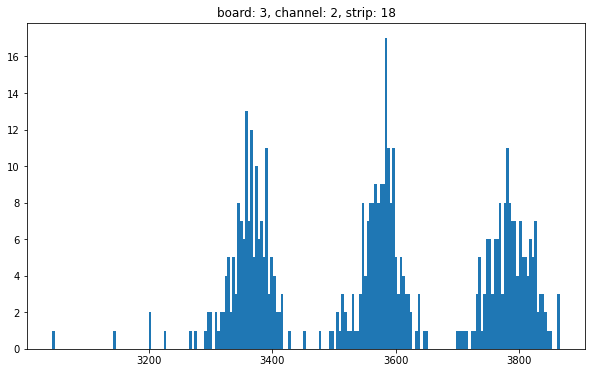

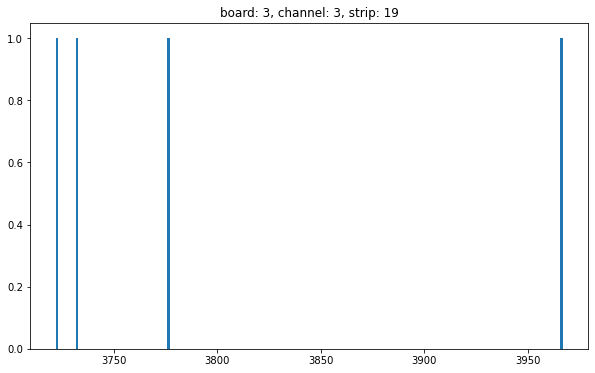

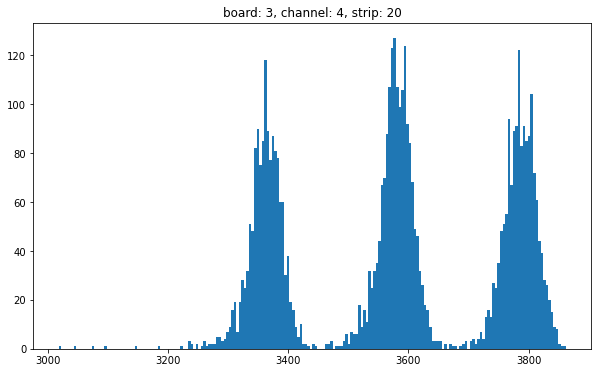

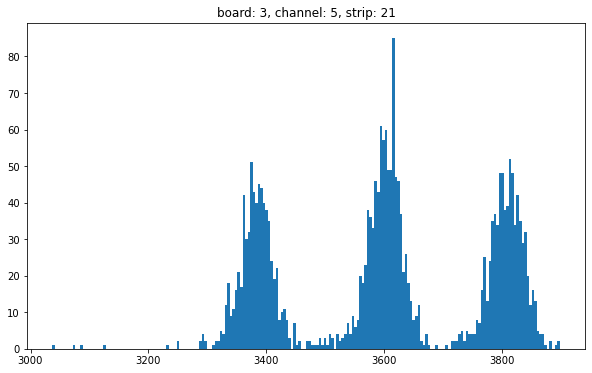

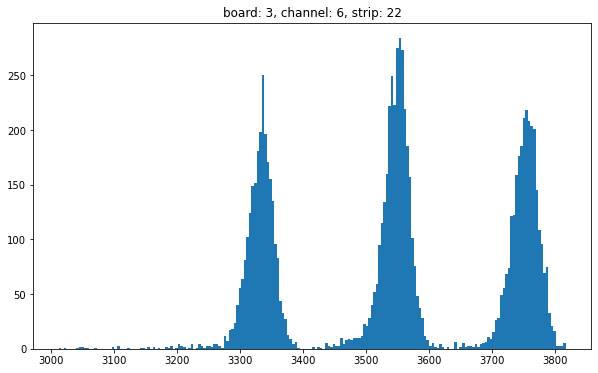

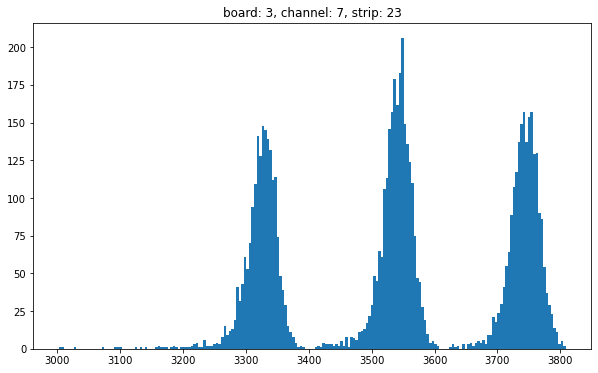

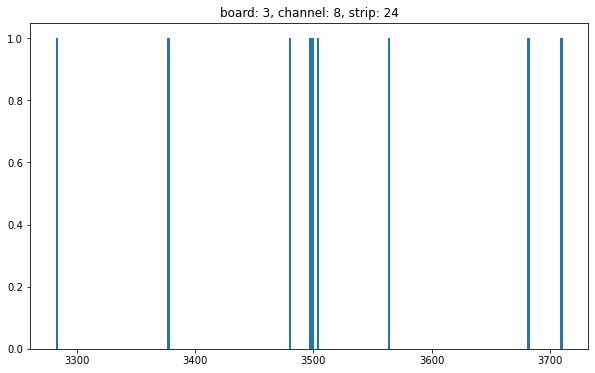

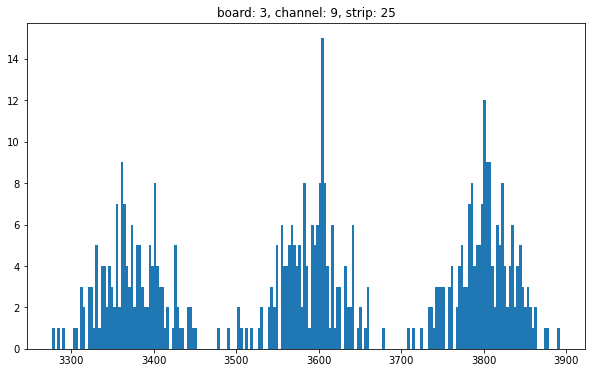

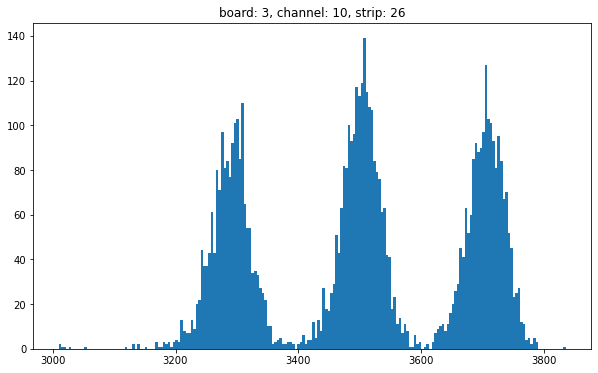

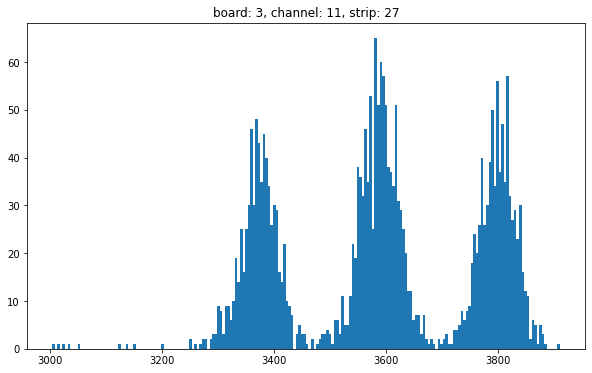

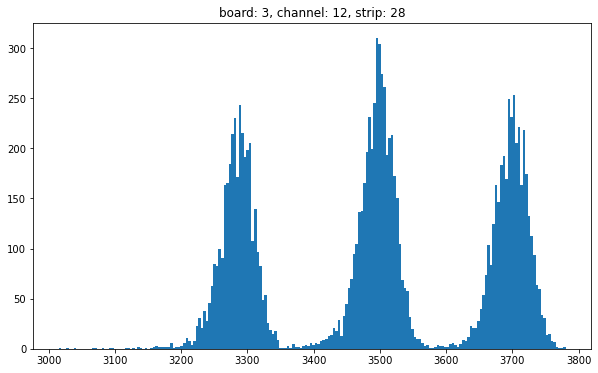

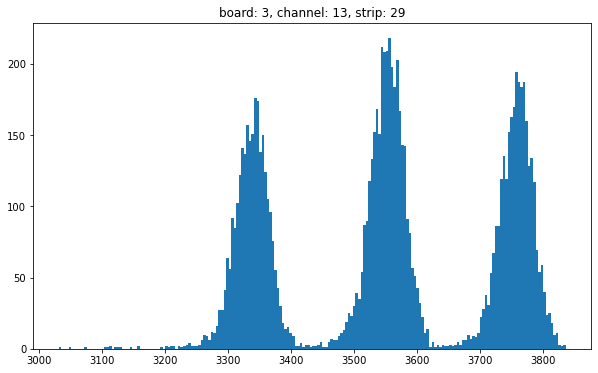

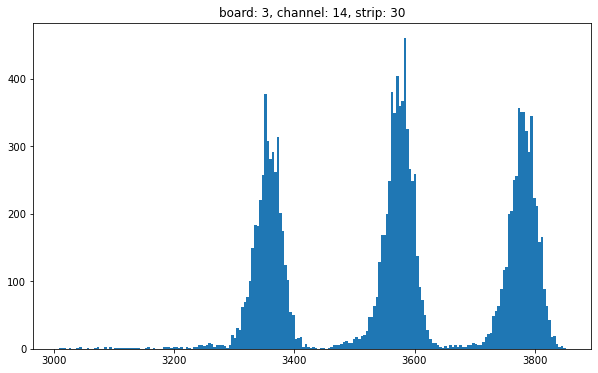

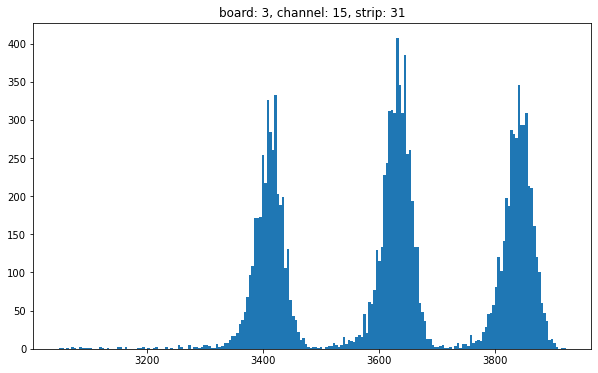

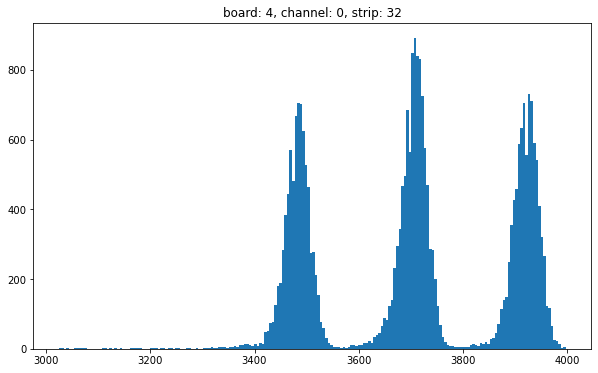

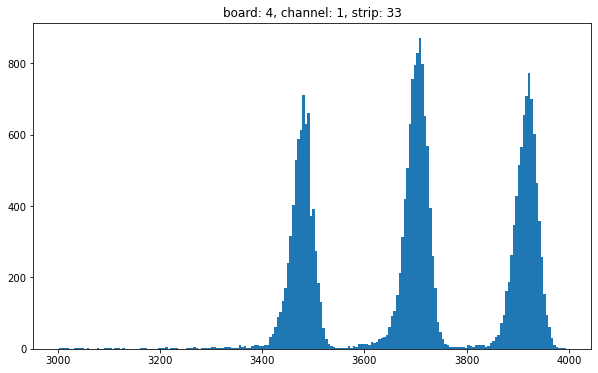

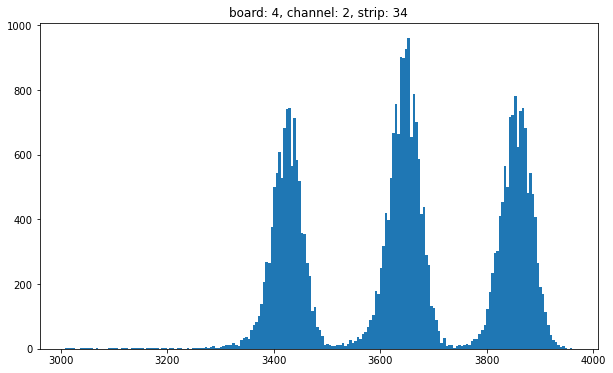

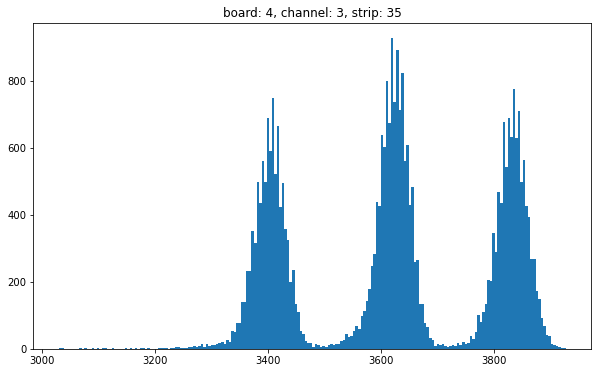

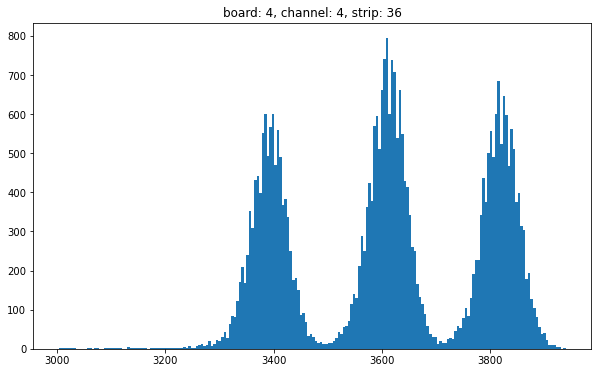

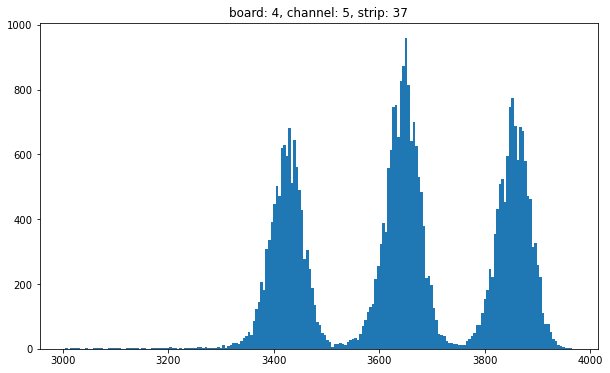

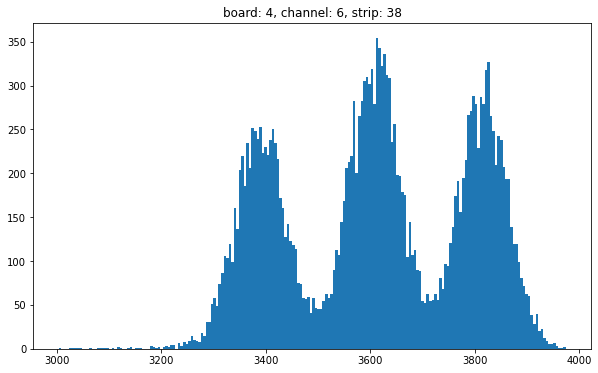

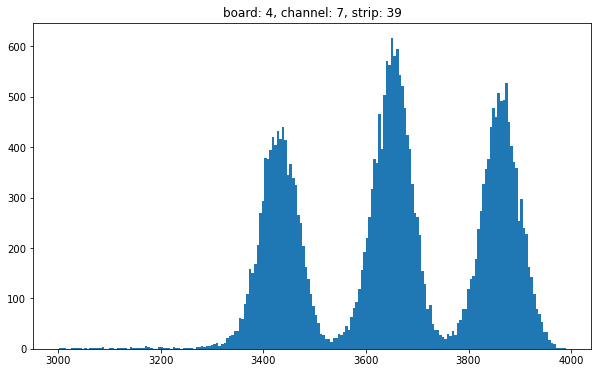

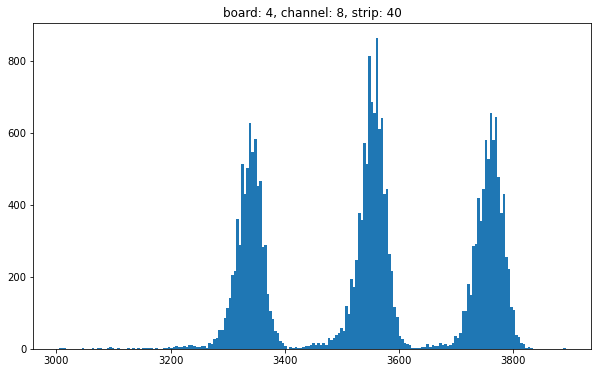

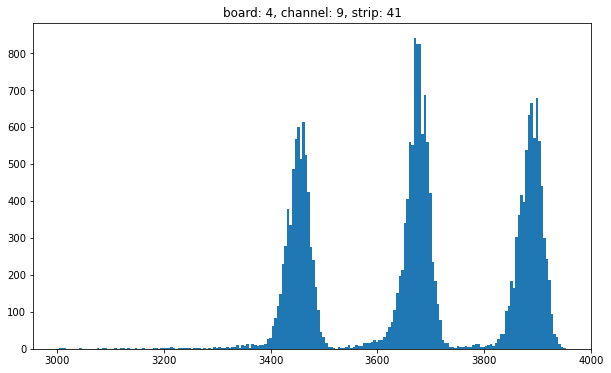

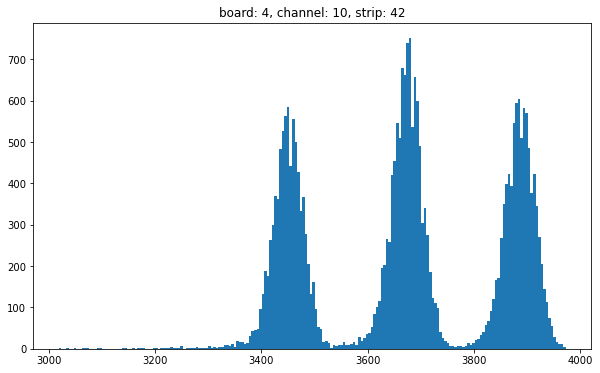

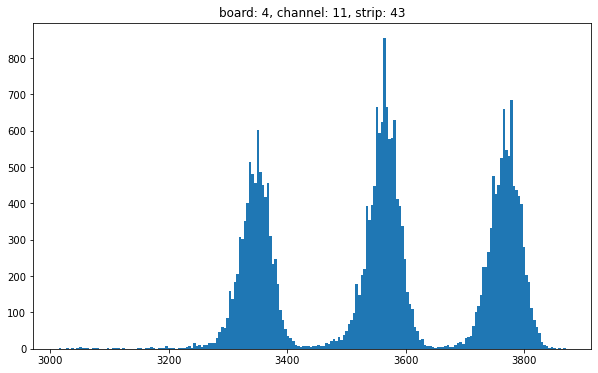

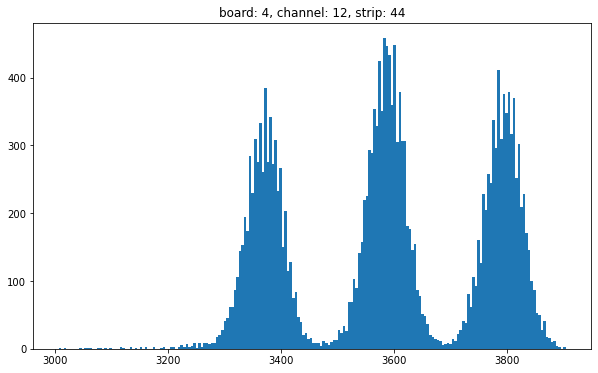

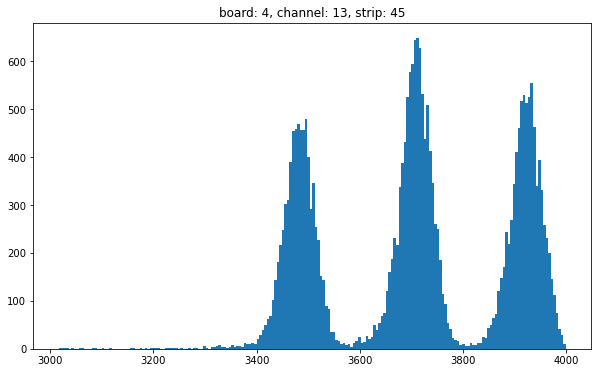

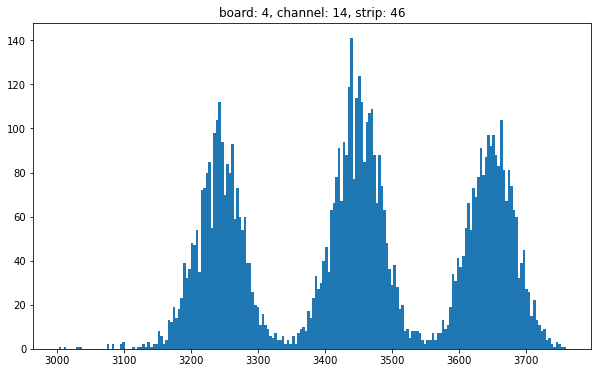

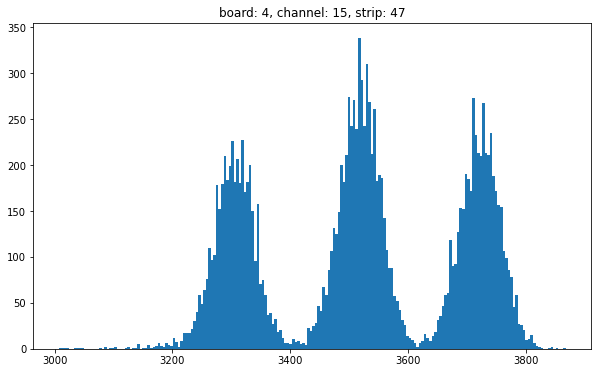

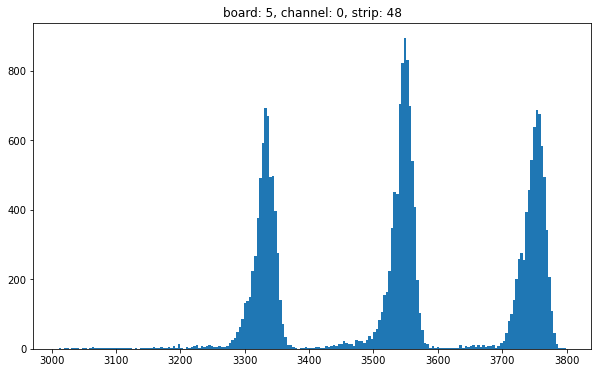

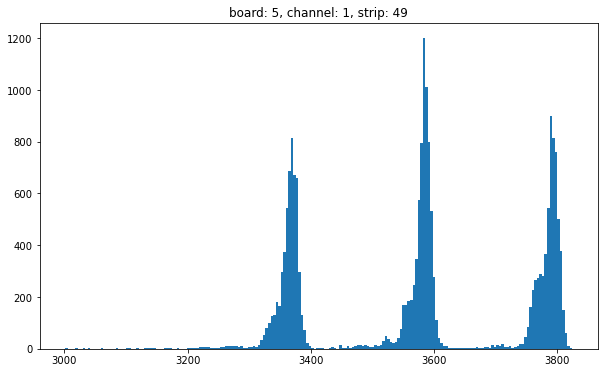

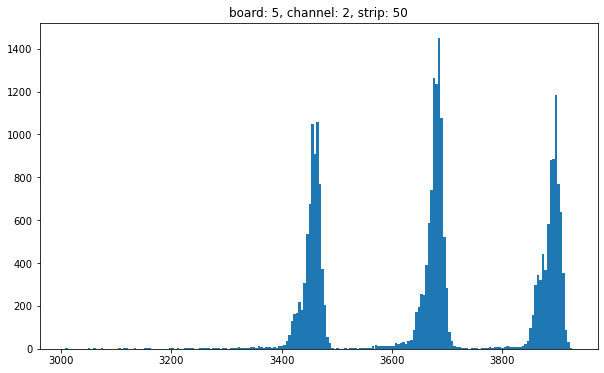

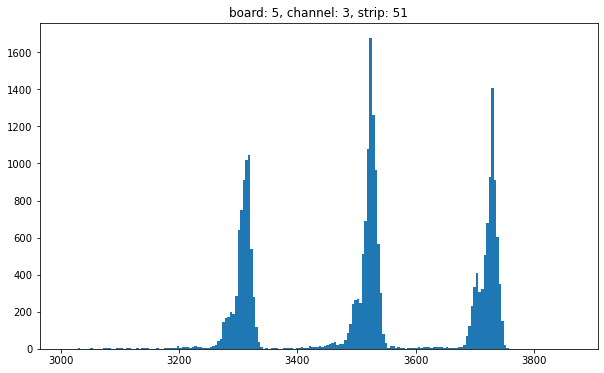

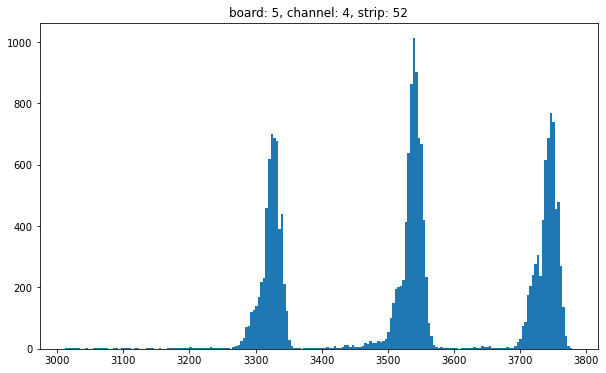

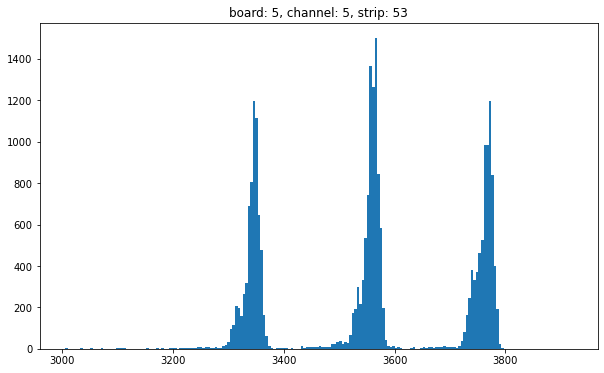

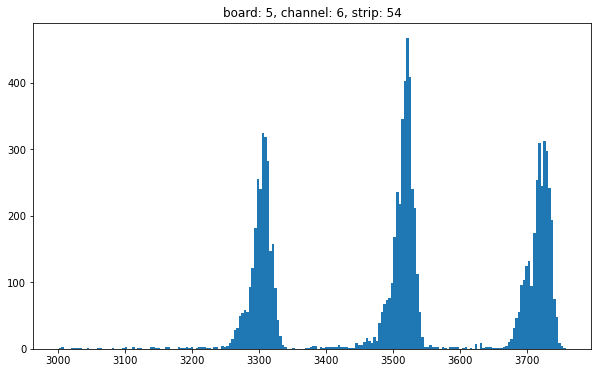

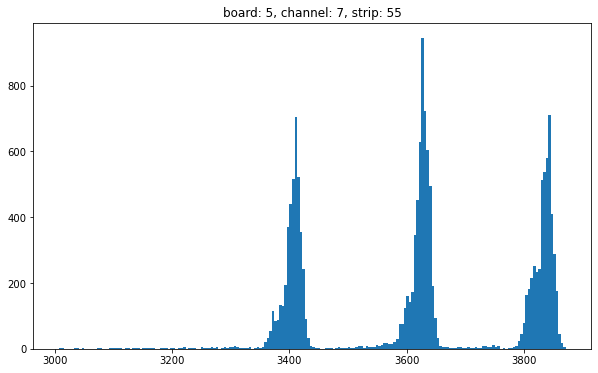

In [15]:
for ch in np.sort(df_e_filtered.ch.unique()):
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111)
    
    mask = (df_e_filtered.ch==ch)
    ax.hist(df_e_filtered[mask]["energy"], bins=200, histtype="bar")
    
    b = df_e_filtered[mask].board.unique()[0]
    c = ch - (b*16)
    
    ax.set_title(f"board: {b}, channel: {c}, strip: {ch-32}")

    plt.show()